# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [19]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl

import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [20]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [21]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [22]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [23]:
df_raw.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

#### Question 3. Why would GRE have a larger STD than GPA?

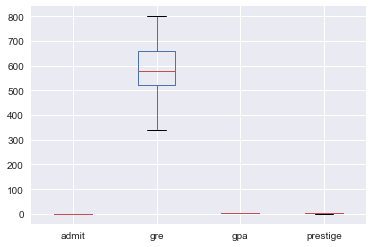

In [24]:
df_raw.plot(kind="box")

Answer: The confidence interval for GRE is much wider compared to GPA

#### Question 4. Drop data points with missing data


In [25]:
df_no_missing = df_raw.dropna()
df_no_missing

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [26]:
df_no_missing.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [27]:
# apply lambda to calculate rows that have null values, before summing total
df_no_missing.apply(lambda x: sum(x.isnull().values), axis = 1)
sum(df_no_missing.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

0

Answer: all columns have same number of filled information. when lambda was applied to calculate rows with null values, sum of the applied lambda function is 0.

#### Question 6. Create box plots for GRE and GPA

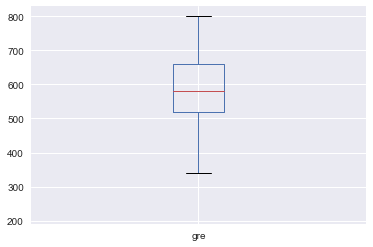

In [28]:
df_raw["gre"].plot(kind="box")

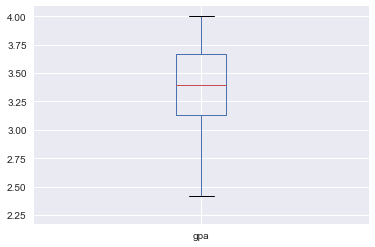

In [29]:
df_raw["gpa"].plot(kind="box")

#### Question 7. What do this plots show?

Answer: the box plots show the distribution of each variable. the GRE has a mean close to 600, and its confidence interval range between 520 and 660. in comparison, GRA has a mean of 3.4, and its confidence interval range between 3.1 and 3.7. thus, GPA has a much smaller range, and has less variation in the data. GRE has outliers around 300 and below. GPA also has outlier below the confidence interval, and the number is smaller smaller at around 2.25.

#### Question 8. Describe each distribution 

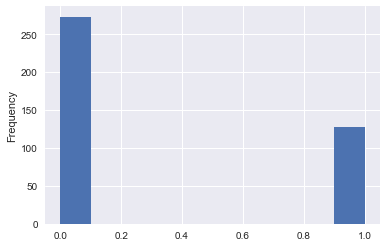

In [30]:
df_raw["admit"].plot(kind="hist")


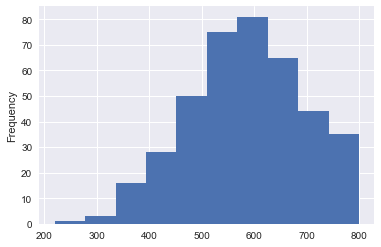

In [31]:
df_raw["gre"].plot(kind="hist")

In [32]:
df_raw["gre"].skew()

-0.15012666594587223

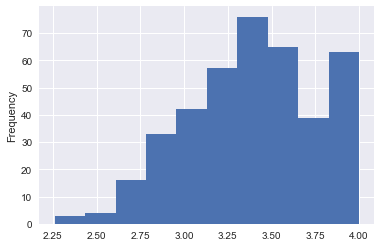

In [33]:
df_raw["gpa"].plot(kind="hist")

In [34]:
df_raw["gpa"].skew()

-0.21176549033509626

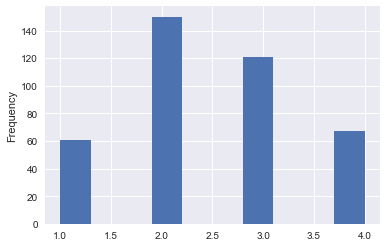

In [35]:
df_raw["prestige"].plot(kind="hist")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The distribution have slight skew.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: distribution is roughly normal. if necessary, the data can be transformed by log, square root, squared...


Question 11. Which of our variables are potentially colinear?

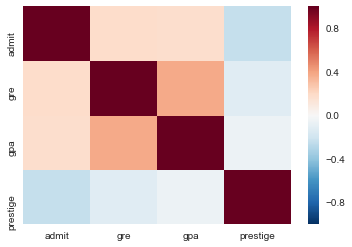

In [41]:
df_corr = df_raw.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values)

In [42]:
print df_corr

             admit       gre       gpa  prestige
admit     1.000000  0.182919  0.175952 -0.241355
gre       0.182919  1.000000  0.382408 -0.124533
gpa       0.175952  0.382408  1.000000 -0.059031
prestige -0.241355 -0.124533 -0.059031  1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are have 0.382408 correlation. Prestige has slight negative correlation with admit (-0.241355).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Goal is to determine if prestige of an undergraduate school can predict admission to graduate school. Assume normal distribution, with logistic regression for GRE, GPA, prestige to admission rate.

#### Question 14. What is your hypothesis? 

Answer: Hypothesis - The better the prestige of the undergraduate school, the more likely it is that the individual is admitted to graduate school

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data